- Building a linear regression model

### Step 1: Importing essential libraries 

In [1]:
import numpy as np     # Numerical Computations
import pandas as pd
import matplotlib.pyplot as plt                                                       # Plotting graphs
from sklearn import datasets, linear_model                                            # Dataset and Linear Regression Model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error         # Evaluating Model

### Step 2: Reading and understanding the data

In [2]:
advertising = pd.read_csv("https://raw.githubusercontent.com/mona-patra/FDP-5days/main/Day%202/advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# checking all features
advertising.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [3]:
# Shape of our dataset
print(advertising.shape)

(200, 4)


In [5]:
# Info our dataset
print(advertising.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [6]:
# Describe our dataset
print(advertising.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


### Step 3: Visualizing the data

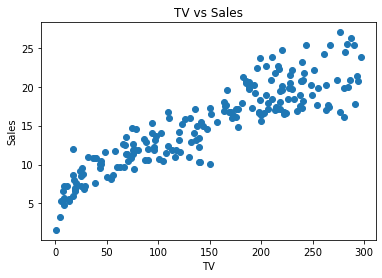

In [7]:
# Import matplotlib libraries to visualize the data
import matplotlib.pyplot as plt 
plt.scatter(advertising.TV,advertising.Sales)
plt.title("TV vs Sales")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

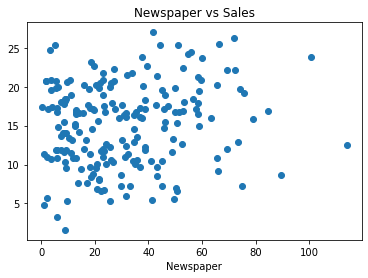

In [10]:
# Import matplotlib libraries to visualize the data
import matplotlib.pyplot as plt 
plt.scatter(advertising.Newspaper,advertising.Sales)
plt.title("Newspaper vs Sales")
plt.xlabel("Newspaper")
plt.show()

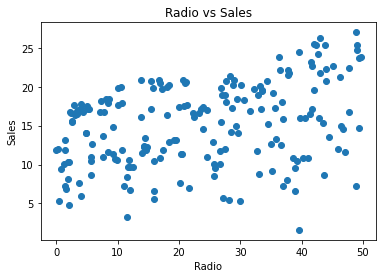

In [11]:
# Import matplotlib libraries to visualize the data
import matplotlib.pyplot as plt 
plt.scatter(advertising.Radio,advertising.Sales)
plt.title("Radio vs Sales")
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()

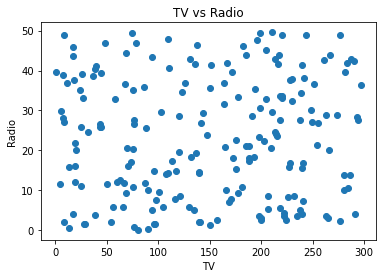

In [12]:
# Import matplotlib libraries to visualize the data
import matplotlib.pyplot as plt 
plt.scatter(advertising.TV,advertising.Radio)
plt.title("TV vs Radio")
plt.xlabel("TV")
plt.ylabel("Radio")
plt.show()

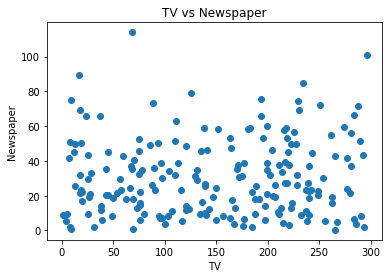

In [13]:
# Import matplotlib libraries to visualize the data
import matplotlib.pyplot as plt 
plt.scatter(advertising.TV,advertising.Newspaper)
plt.title("TV vs Newspaper")
plt.xlabel("TV")
plt.ylabel("Newspaper")
plt.show()

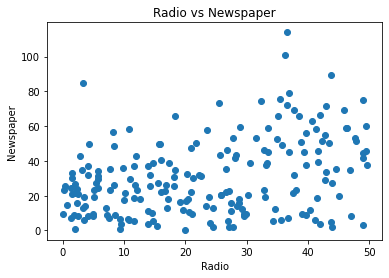

In [14]:
# Import matplotlib libraries to visualize the data
import matplotlib.pyplot as plt 
plt.scatter(advertising.Radio,advertising.Newspaper)
plt.title("Radio vs Newspaper")
plt.xlabel("Radio")
plt.ylabel("Newspaper")
plt.show()

# Correlation Matrix

## As we can see from the above graphs as well as the correlation matrix below, the TV column seems most correlated to Sales

In [4]:
corr = advertising.corr()
corr.style.background_gradient(cmap='coolwarm')

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

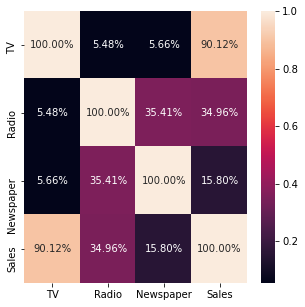

In [15]:
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(corr,annot = True,fmt='.2%')

# As we can see from the above graphs, the TV column seems most correlated to Sales

### Step 4: Performing simple linear regression

Sales = m * TV + c

We’ll perform simple linear regression in four steps.
- Create Input(X) and Output(y)
- Create Train and Test set
- Train your model
- Evaluate the model

In [5]:
# Creating X and y
X = advertising['TV']
y = advertising['Sales']

In [17]:
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [18]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [32]:
X.shape

(200,)

In [4]:
y.shape

(200,)

In [19]:
# Reshaping Data Properly
X = X.values.reshape(-1,1)

In [20]:
X.shape

(200, 1)

In [20]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [21]:
# Take a look at the splittted dataset
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 1)
(200,)
(140, 1)
(60, 1)
(140,)
(60,)


In [22]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [24]:
regr.coef_

array([0.05454575])

In [25]:
regr.intercept_

6.948683200001357

Sales = 0.054 * TV + 6.948

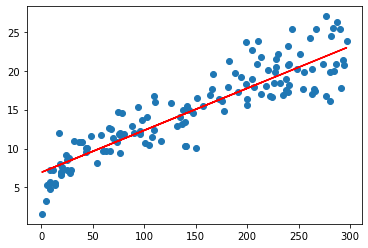

In [23]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

### Step 5: Predictions on the test set and Residual analysis

Error = Actual y value - y predicted value

In [24]:
# Predicting y_value using teting data of X
y_pred = regr.predict(X_test)

# Creating residuals from the y_train and y_pred
res = (y_test - y_pred)

In [26]:
import warnings
warnings.filterwarnings('ignore')

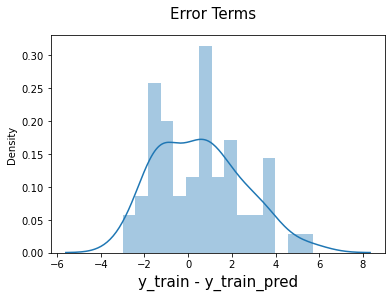

In [27]:
import seaborn as sns
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

### Step 6: Evaluting model

In [28]:
# Checking the R-squared value
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245662

In [29]:
# Mean square error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The mean absolute error
print('Mean Absolute Error: %.2f'% mean_absolute_error(y_test, y_pred))

Mean squared error: 4.08
Mean Absolute Error: 1.648059


Take home Assignment

We solved above a problem, where we had implemented linear regression with one feature and one target. 

However, in the real world, most machine learning problems require us to work with more than one feature.

We will now consider the home loan approval dataset, where we will calculate an individual’s home loan eligibility, depending not only on the age of the person but also on the credit rating and other features.

Therefore in order to determine  whether or not a person should be eligible for a home loan, you’ll have to collect multiple features, such as age, income, credit rating, number of dependents, etc.

You have to work on this multiple regression

Step 1:  Import necessary libraries
Step 2: Reading the dataset

df = pd.read_csv("https://raw.githubusercontent.com/mona-patra/FDP-5days/main/Day%202/loan-approval-dataset.csv")

Step 3: Understanding the dataset, finding shape of the dataset, info on the dataset, correlation among the variables etc.

Step 4: Defining X and y, where
X = df[['age','credit-rating','children']]
y = df['loan-approval']

Step 5: Create Train and Test set

Step 6: Train your model

Step 7: Evaluate the model